# Tensorflow Beginner Tutorial

This tutorial is based on this youtube link https://www.youtube.com/watch?v=qFJeN9V1ZsI.

Check out the blog post and other resources for [this course](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqbkdudlB0TFZSWldWbDNVOFpyVjhQLVlPRHpaZ3xBQ3Jtc0tucW1xU2VVdFpBa0lDck43aUlqalhZQ2hNSDZXLWxMbVZEcFB0eWowSmF3ZkJzcXAtTHBzOUVGN3gydi00aUd1LWFwSVNCWXdTYXo1TjFZUnJvSTJ1QzdnOTZRYmRGTlBkcVpURjdFVHUzcUxnU3I5Yw&q=https%3A%2F%2Fdeeplizard.com%2Flearn%2Fvideo%2FRznKVRTFkBY).

## Tensorflow develop requirement

In [ ]:
# install tensorflow
!pip3 install tensorflow==2.8 # or
!conda install -c conda-forge tensorflow -y

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::python-language-server==0.36.2=pyhd3eb1b0_0
  - defaults/noarch::pyls-black==0.4.6=hd3eb1b0_0
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::python-language-server==0.36.2=pyhd3eb1b0_0
  - defaults/noarch::pyls-black==0.4.6=hd3eb1b0_0
\ 

In [5]:
# check tensorflow version
import tensorflow as tf
tf.__version__

'2.5.0'

## Keras with TensorFlow - Data Processing for Neural Network Training

In [10]:
# import required libraries
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

**Example data**
- An experiemental drug was tested on individuals from ages 13 to 100 in a clinical trail
- The trail had 2100 participants. Half were under 65 years old, half were 65 years or older
- Around 95% of patients 65 or older experienced side effects
- Around 95% of patients under 65 experienced no side effects

In [11]:
train_labels, train_samples = [], []

In [12]:
for i in range(50):
    # the ~5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # the ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # the ~95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # the ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [13]:
# convert data into a pandas array
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [14]:
# normalise data use min-max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [15]:
scaled_train_samples[:5]

array([[0.94252874],
       [0.79310345],
       [0.42528736],
       [0.65517241],
       [0.51724138]])

## Create an Artificial Neural Network with TensorFlow's Keras API

In [1]:
# import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
# check GPU availability
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print('Num GPUs Available: ', len(physical_devices))

# there should be error if there is no GPU detected
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


IndexError: list index out of range

### Sample tf.keras Sequential Model

Model without validation set.

In [19]:
# construct a sequential model
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

# print model summary information
model.summary()

# compile the above model 
# optimizer: gradient descent algorithm to approximate the answer with faster mathematical approach
# loss: calculate the loss on information, less loss = better model
# metrics: evaluation metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the data
model.fit(x=scaled_train_samples,
          y=train_labels, 
          batch_size=10, # how many sample in one batch at one time it will be passed to network 
          epochs=30, # model will train all data 30 times
          shuffle=True, # shuffle dataset
          verbose=2 # 0, 1, 2
         )

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
210/210 - 0s - loss: 0.6758 - accuracy: 0.5881
Epoch 2/30
210/210 - 0s - loss: 0.6449 - accuracy: 0.6229
Epoch 3/30
210/210 - 0s - loss: 0.6092 - accuracy: 0.6957
Epoch 4/30
210/210 - 0s - loss: 0.5706 - accuracy: 0.7619
Epoch 5/30
210/210 - 0s - loss: 0.5358 - accuracy: 0.7967
Epoch 6/30
210/210 - 0s - loss: 0.5009 - accuracy: 0.8357
Epoch 7/30
210/210 - 0s - loss: 0.4668

Model with validation set = 0.1

In [18]:
# construct a sequential model
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

# print model summary information
model.summary()

# compile the above model 
# optimizer: gradient descent algorithm to approximate the answer with faster mathematical approach
# loss: calculate the loss on information, less loss = better model
# metrics: evaluation metric
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the data
model.fit(x=scaled_train_samples,
          y=train_labels, 
          validation_split=0.1, # set the proportion for validation, these won't be trained by tensorflow
          batch_size=10, # how many sample in one batch at one time it will be passed to network 
          epochs=30, # model will train all data 30 times
          shuffle=True, # shuffle dataset
          verbose=2 # 0, 1, 2
         )

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_7 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
189/189 - 1s - loss: 0.7003 - accuracy: 0.4529 - val_loss: 0.6833 - val_accuracy: 0.5762
Epoch 2/30
189/189 - 0s - loss: 0.6716 - accuracy: 0.5767 - val_loss: 0.6514 - val_accuracy: 0.6429
Epoch 3/30
189/189 - 0s - loss: 0.6401 - accuracy: 0.6783 - val_loss: 0.6156 - val_accuracy: 0.7190
Epoch 4/30
189/189 - 0s - loss: 0.6073 - accuracy: 0.7418 - val_loss: 0.5815 - val_acc

## Neural Network Predictions with TensorFlow's Keras API

In [20]:
# import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [22]:
# define the test variables
test_labels, test_samples = [], []

for i in range(10):
    # the 5% of younger individuals who did experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # the 5% older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    # the 95% of younger individuals who did not experience side effects
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # the 95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [23]:
# convert data into numpy array and shuffle them
test_labels, test_samples = np.array(test_labels), np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [24]:
# scale the data with MinMaxScaler
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [27]:
# predict based on the above model
predictions = model.predict(x=scaled_test_samples,
                            batch_size=10,
                            verbose=1)

42/42 [==============================] - 0s 1ms/step


In [29]:
# visualise prediction set
predictions[:5]

array([[0.2655584 , 0.73444164],
       [0.96989477, 0.03010521],
       [0.70501405, 0.294986  ],
       [0.02103731, 0.9789627 ],
       [0.89381665, 0.10618334]], dtype=float32)

In [31]:
# arg-max
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions[:5]

array([1, 0, 0, 1, 0])

## Create a Confusion Metrix for Neural Network Predictions

In [45]:
# import requied libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
# construct the confusion matrix
cm = confusion_matrix(y_true=test_labels,
                         y_pred=rounded_predictions)

# not important, evaluate the value of tn, fp, fn, tp from confusion matrix
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(196, 14, 10, 200)

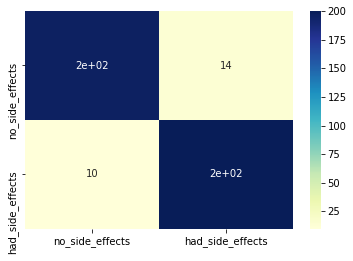

In [66]:
# plot the matrix use searborn heatmap
cm_plot_labels = ['no_side_effects', 'had_side_effects']

sns.heatmap(data=cm, cmap='YlGnBu', 
            xticklabels=cm_plot_labels, 
            yticklabels=cm_plot_labels,
            annot=True)
plt.show()

## Save and Load a Model with TensorFlow's Keras API

### Model Save & Load via built-in function 

In [72]:
# save model via a model.save() function
# checkt first to see if file exists already, if not, the model is saved to disk
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('model/medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allow to re-create the model
- The weights of the model
- The training configuration (loss, optimizer)
- The state of the optimizer, allowing to resuem training exactly where you left off

In [73]:
# import load module and load the .h5 model file
from tensorflow.keras.models import load_model
new_model = load_model('model/medical_trial_model.h5')

In [74]:
# check model
new_model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [75]:
# check weights
new_model.get_weights()

[array([[-0.2453197 ,  0.62692946, -0.57432616,  0.5029591 ,  0.5672134 ,
         -0.0124665 , -0.00867534,  0.34111133, -0.11166951,  0.35493356,
         -0.17245662, -0.39856756, -0.33936626,  0.68436104,  0.48601544,
         -0.49799907]], dtype=float32),
 array([ 0.        , -0.08961309,  0.        , -0.16433328, -0.11553204,
         0.22433533,  0.20716096, -0.11276904,  0.        , -0.11971471,
         0.        ,  0.        ,  0.        , -0.18014596, -0.12307021,
         0.        ], dtype=float32),
 array([[ 1.23330951e-02, -3.21351916e-01,  2.73087621e-03,
          1.09673440e-01,  1.42646670e-01, -1.27048388e-01,
         -6.46701157e-02,  6.55634701e-02,  3.32103163e-01,
          1.26492560e-01,  1.56111866e-01, -1.18497297e-01,
         -3.21724266e-01, -1.62737831e-01,  3.85228097e-02,
         -2.21373796e-01, -1.24827921e-02,  2.73079485e-01,
         -2.97189653e-01, -1.97446600e-01, -2.39430174e-01,
          1.35168225e-01, -2.46646047e-01,  2.52100378e-01,
 

In [76]:
# check optimiser
new_model.optimizer

### Save model architecture via model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [77]:
# save as JSON
json_string = model.to_json()

# save as YAML
yaml_string = model.to_yaml()

In [78]:
json_string, yaml_string

('{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_9_input"}}, {"class_name": "Dense", "config": {"name": "dense_9", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_10", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null,

In [79]:
# load and reconstruction from JSON and YAML
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import model_from_yaml

model_architecture_json = model_from_json(json_string)
model_architecture_yaml = model_from_yaml(json_string)

model_architecture_json.summary(), model_architecture_yaml.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
__________________________________

(None, None)

### model.save_weights
If you only need to save the weights of a model, you can use the following function save the weights only.

In [80]:
# checks first to see if the exists already
# if not, the weights are saved to disk
import os.path
if os.path.isfile('model/my_model_weights.h5') is False:
    model.save_weights('model/my_model_weights.h5')

In [86]:
# create a new model to load the exist weights
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [87]:
model2.load_weights('model/my_model_weights.h5')

In [88]:
model2.get_weights()

[array([[-0.2453197 ,  0.62692946, -0.57432616,  0.5029591 ,  0.5672134 ,
         -0.0124665 , -0.00867534,  0.34111133, -0.11166951,  0.35493356,
         -0.17245662, -0.39856756, -0.33936626,  0.68436104,  0.48601544,
         -0.49799907]], dtype=float32),
 array([ 0.        , -0.08961309,  0.        , -0.16433328, -0.11553204,
         0.22433533,  0.20716096, -0.11276904,  0.        , -0.11971471,
         0.        ,  0.        ,  0.        , -0.18014596, -0.12307021,
         0.        ], dtype=float32),
 array([[ 1.23330951e-02, -3.21351916e-01,  2.73087621e-03,
          1.09673440e-01,  1.42646670e-01, -1.27048388e-01,
         -6.46701157e-02,  6.55634701e-02,  3.32103163e-01,
          1.26492560e-01,  1.56111866e-01, -1.18497297e-01,
         -3.21724266e-01, -1.62737831e-01,  3.85228097e-02,
         -2.21373796e-01, -1.24827921e-02,  2.73079485e-01,
         -2.97189653e-01, -1.97446600e-01, -2.39430174e-01,
          1.35168225e-01, -2.46646047e-01,  2.52100378e-01,
 